In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download omkargurav/face-mask-dataset

In [ ]:
!unzip /content/face-mask-dataset.zip

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_images=[]
train_y=[]
test_images=[]
test_y=[]

In [ ]:
mask='/content/data/with_mask/'
no_mask='/content/data/without_mask/'

In [ ]:
for count, filename in enumerate(os.listdir(no_mask)):
  path=os.path.join(no_mask, filename)
  img=(cv2.imread(path)[:,:,::-1])
  img=cv2.resize(img, (224, 224))
  if (count<=3499):
    train_images.append(img)
    train_y.append([1])
  elif (count>3499 and count<=3724):
    test_images.append(img)
    test_y.append([1])
  elif (count>3724):
    break

In [ ]:
for count, filename in enumerate(os.listdir(mask)):
  path=os.path.join(mask, filename)
  img=(cv2.imread(path)[:,:,::-1])
  img=cv2.resize(img, (224, 224))
  if (count<=3499):
    train_images.append(img)
    train_y.append([0])
  elif (count>3499 and count<=3724):
    test_images.append(img)
    test_y.append([0])
  elif (count>3724):
    break

In [ ]:
train_images=np.array(train_images)
test_images=np.array(test_images)

In [ ]:
print(train_images.shape)
print(test_images.shape)

(7000, 224, 224, 3)
(450, 224, 224, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,preprocessing_function=preprocess_input)
training_set = train_datagen.flow(train_images,train_y, batch_size=64)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1/255,preprocessing_function=preprocess_input)
test_set=test_datagen.flow(test_images,test_y,batch_size=64)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, AveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vgg=VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
x = Flatten()(vgg.output)
x1 = Dense(100, activation='relu')(x)
x2 = Dropout(0.5)(x1)
output1=Dense(1, activation='sigmoid')(x2)

In [ ]:
model=Model(inputs=vgg.input, outputs=output1)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
history=model.fit(training_set, validation_data=(test_set), epochs=5, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/5
110/110 [==============================] - 91s 822ms/step - loss: 0.0676 - accuracy: 0.9759 - val_loss: 0.0466 - val_accuracy: 0.9778
Epoch 2/5
110/110 [==============================] - 90s 814ms/step - loss: 0.0537 - accuracy: 0.9810 - val_loss: 0.0408 - val_accuracy: 0.9889
Epoch 3/5
110/110 [==============================] - 90s 817ms/step - loss: 0.0476 - accuracy: 0.9823 - val_loss: 0.0375 - val_accuracy: 0.9822
Epoch 4/5
110/110 [==============================] - 90s 812ms/step - loss: 0.0520 - accuracy: 0.9803 - val_loss: 0.0659 - val_accuracy: 0.9756
Epoch 5/5
110/110 [==============================] - 89s 810ms/step - loss: 0.0442 - accuracy: 0.9831 - val_loss: 0.0377 - val_accuracy: 0.9800


In [ ]:
def summarize_diagnostics(history):
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

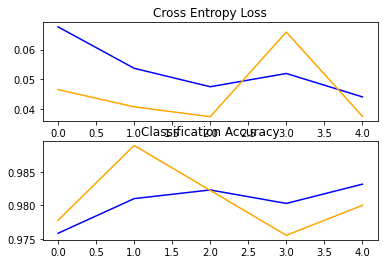

In [ ]:
summarize_diagnostics(history=history)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Mask_Detection_Kaggle/model.h5')

In [ ]:
from keras.preprocessing import image
from PIL import Image

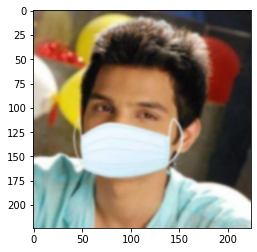

In [ ]:
img_path='/content/data/with_mask/with_mask_1899.jpg'
plt.imshow(img)

In [ ]:
image1=Image.open('/content/data/with_mask/with_mask_1899.jpg')
print(image1.size)
new_image=image1.resize((224, 224))
print(new_image.size)

(351, 366)
(224, 224)


In [ ]:
pred_image=image.img_to_array(new_image)
pred_image=np.expand_dims(pred_image, axis=0)
result=model.predict(pred_image)
result=result.reshape(-1)
print(result)

[0.]


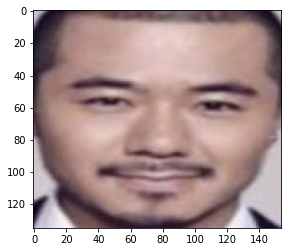

In [ ]:
img_path = '/content/data/without_mask/without_mask_10.jpg'
img=(cv2.imread(img_path)[:,:,::-1])
plt.imshow(img)

In [ ]:
image2=Image.open('/content/data/without_mask/without_mask_10.jpg')
print(image2.size)
new_image2=image2.resize((224, 224))
print(new_image2.size)

(154, 135)
(224, 224)


In [ ]:
pred_image2=image.img_to_array(new_image2)
pred_image2=np.expand_dims(pred_image2, axis=0)
result2=model.predict(pred_image2)
result2=result2.reshape(-1)
print(result2)

[1.]
